In [2]:
%reload_ext autoreload
%autoreload
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import csv
from wordcloud import WordCloud, STOPWORDS
from pathlib import Path
from PIL import Image

In [4]:
path = Path("Desktop")
path

PosixPath('Desktop')

In [5]:
data = pd.read_csv(path/'tont.csv')
data;

In [6]:
text = data.text.values

array(['3.4 million jobs created since our great Election Victory - far greater than ever anticipated and only getting better as new and greatly improved Trade Deals start coming to fruition!',
       '90% of the Drugs coming into the United States come through Mexico and our Southern Border. 80000 people died last year 1000000 people ruined. This has gone on for many years and nothing has been done about it. We have a 100 Billion Dollar Trade Deficit with Mexico. It’s time!',
       'A classic - China just signs massive oil and gas deal with Russia giving Russia plenty of ammo to continue laughing in U.S. face.',
       ...,
       'You talk tough Mr. President but have done nothing about China killing our jobs and economy.',
       'Your all time favorite President got tired of waiting for China to help out and start buying from our FARMERS the greatest anywhere in the World!',
       'ZTE the large Chinese phone company buys a big percentage of individual parts from U.S. companies. 

In [8]:
from collections import Counter

In [9]:
Counter(text).most_common()

[('agricultural products from our Great Farmers in larger amounts than China ever did and ship it to poor and starving countries in the form of humanitarian assistance. In the meantime we will continue to negotiate with China in the hopes that they do not again try to redo deal!',
  3),
 ('If we bought 15 Billion Dollars of Agriculture from our Farmers far more than China buys now we would have more than 85 Billion Dollars left over for new Infrastructure Healthcare or anything else. China would greatly slow down and we would automatically speed up!',
  3),
 ('Tariffs will bring in FAR MORE wealth to our Country than even a phenomenal deal of the traditional kind. Also much easier and quicker to do. Our Farmers will do better faster and starving nations can now be helped. Waivers on some products will be granted or go to new source!',
  3),
 ('The process has begun to place additional Tariffs at 25% on the remaining 325 Billion Dollars. The U.S. only sells China approximately 100 Billi

In [65]:
skips = ["China", "Trump", "President", "Trade", "Russia", "Mexico"]

In [66]:
for i in skips:
    STOPWORDS.add(i)

In [61]:
STOPWORDS;

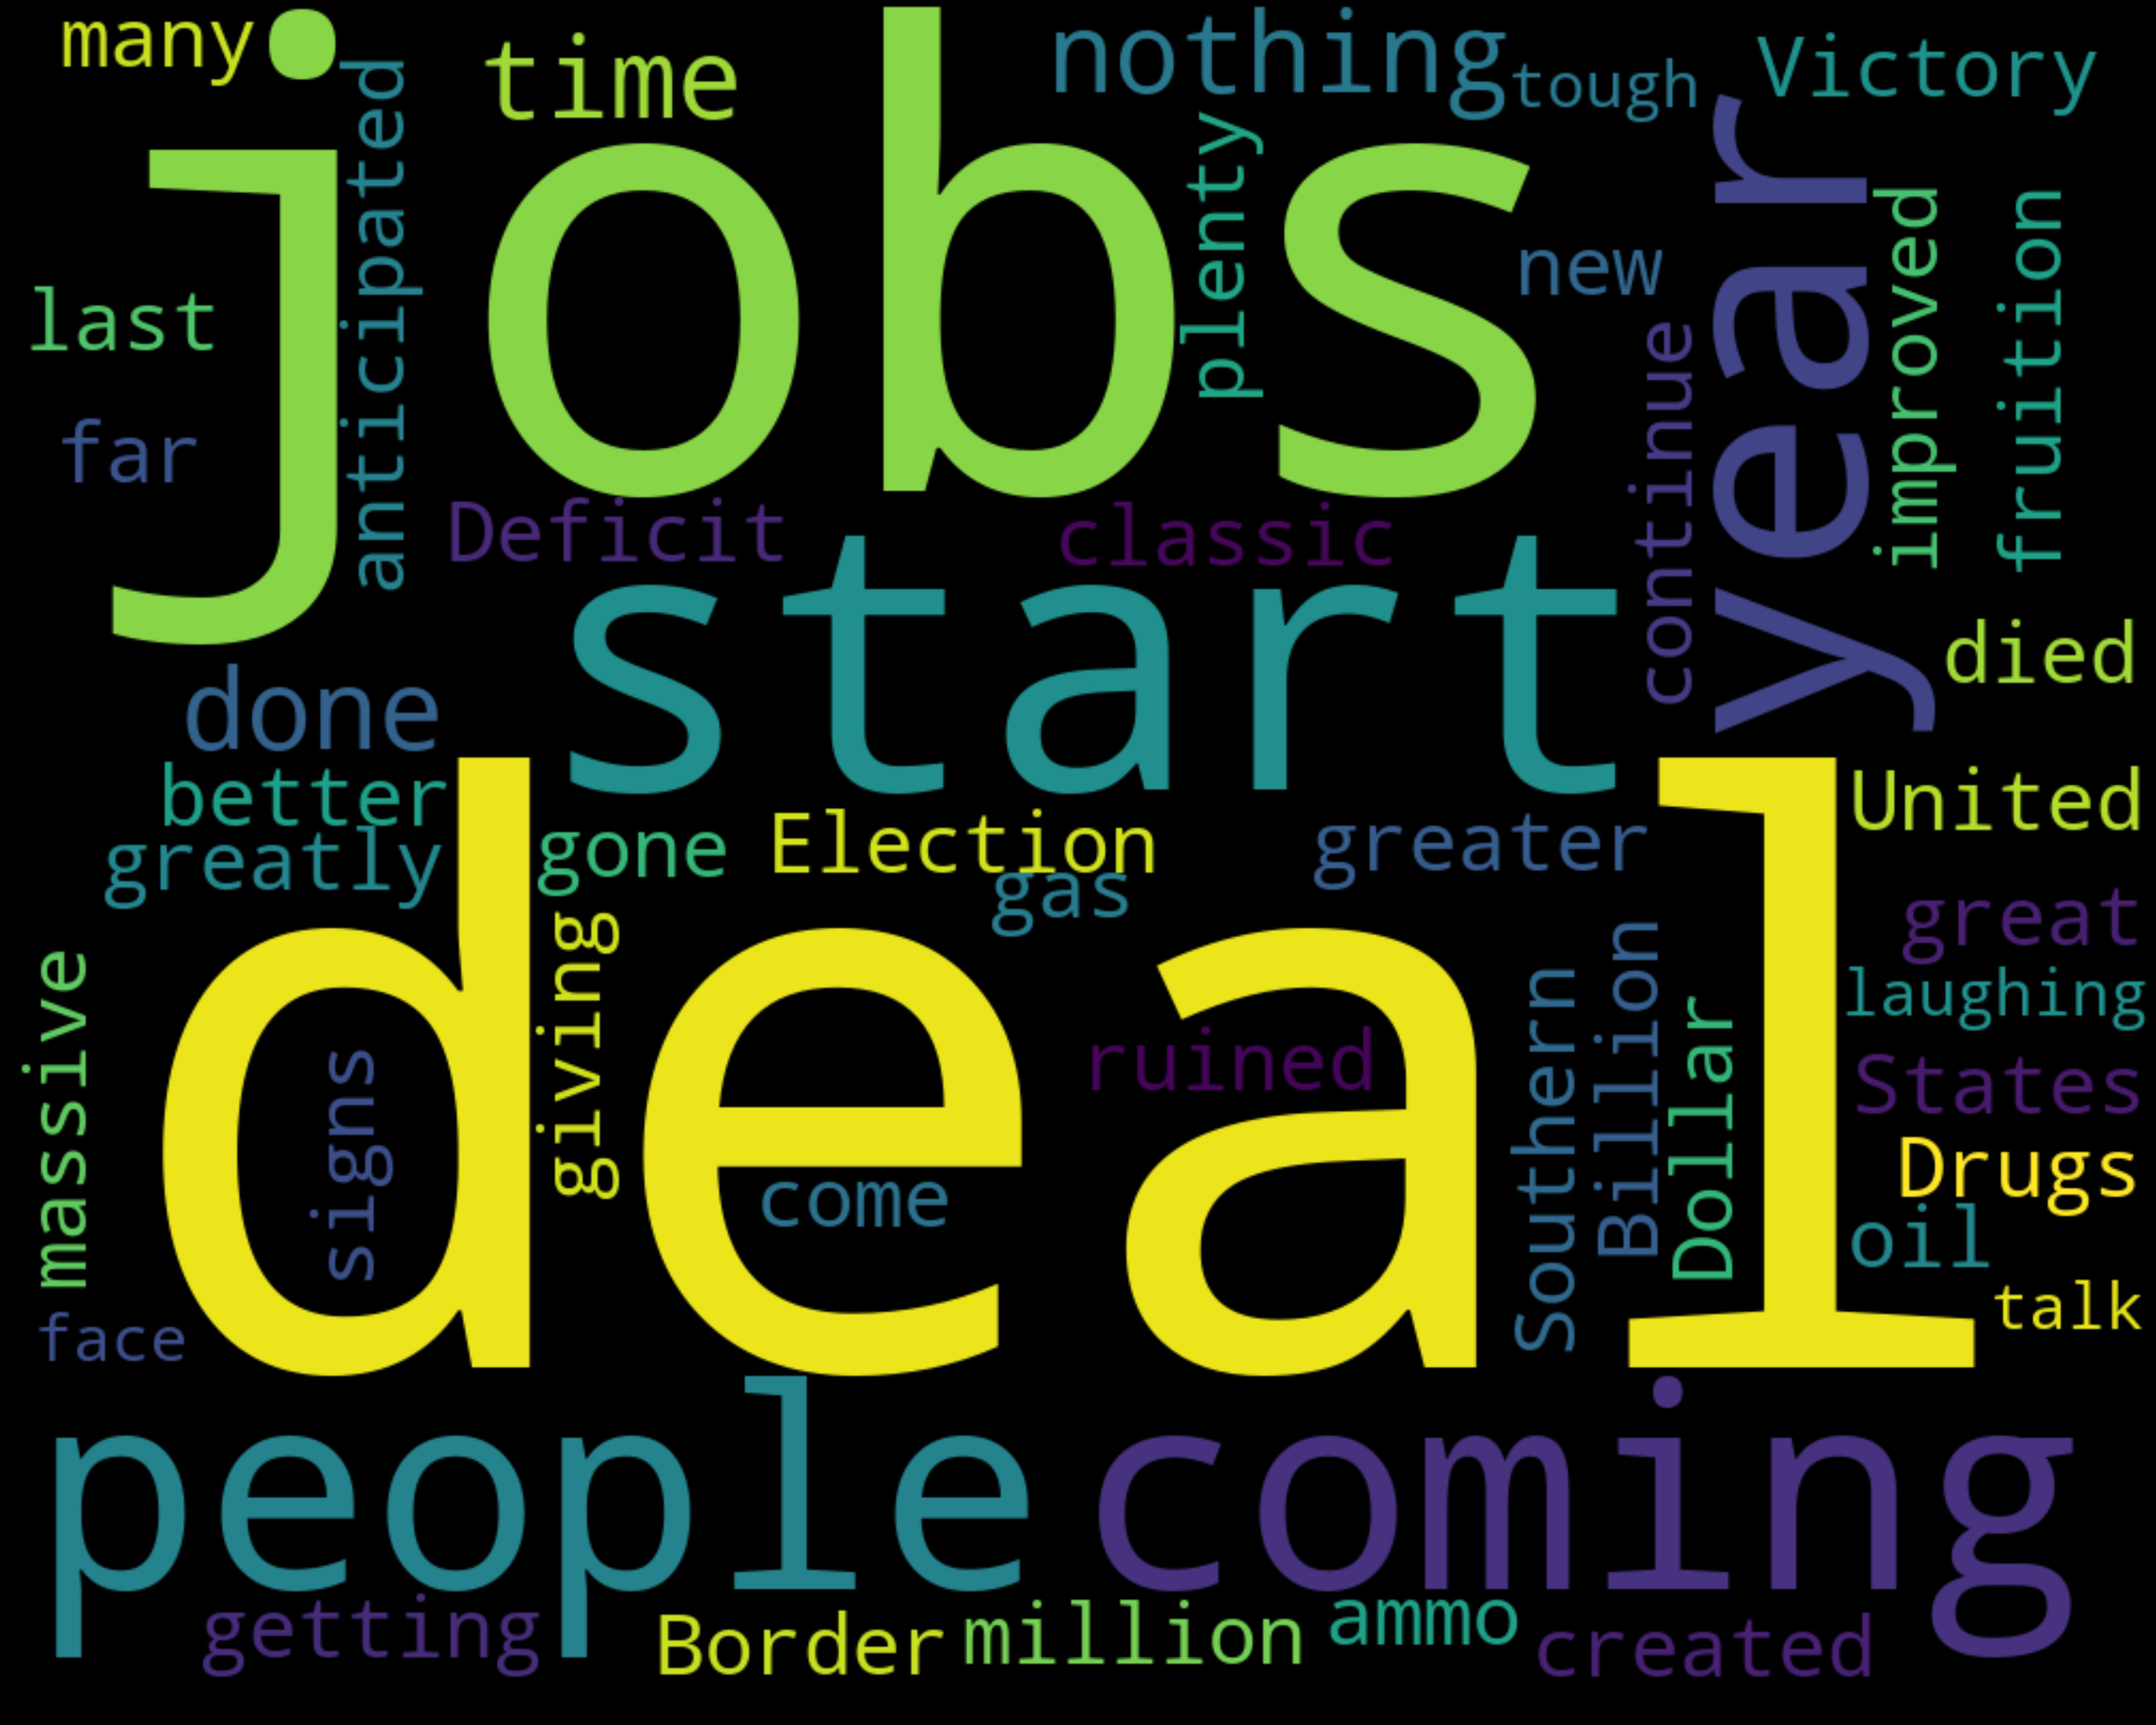

In [80]:
wordcloud = WordCloud(
    width = 1000,
    height = 800,
    max_words= 50, 
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (50, 40),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ModuleNotFoundError: No module named 'Pillow'

In [101]:
mask = np.array(Image.open(path/"china-blank-map5.gif"))

In [102]:
mask

array([[9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9],
       ...,
       [9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9],
       [9, 9, 9, ..., 9, 9, 9]], dtype=uint8)

In [92]:
def transform_format(val):
    if val == 9:
        return 255
    else:
        return val

In [93]:
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_mask[i] = list(map(transform_format, mask[i]))

In [94]:
transformed_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [103]:
wc = WordCloud(background_color="white", max_words=100, mask=mask,
               stopwords=STOPWORDS, contour_width=3, contour_color='firebrick')

In [104]:
wc.generate(str(text))

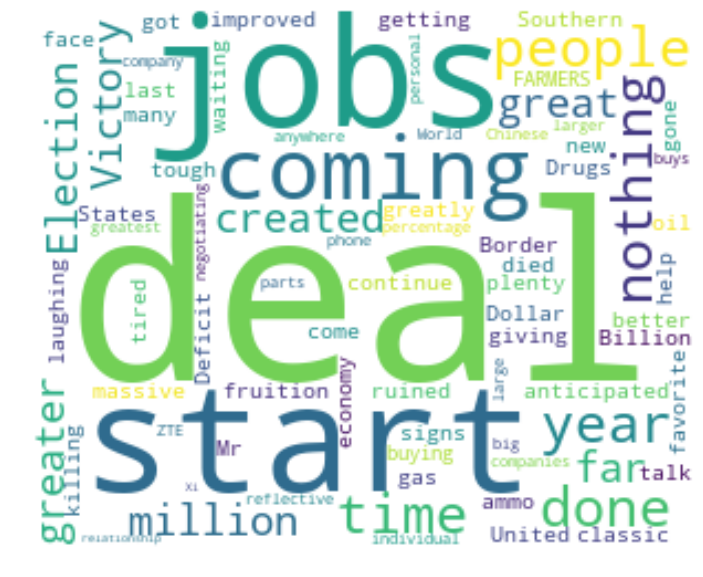

In [105]:
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
data2 = data

In [17]:
data2.rename( columns={'Unnamed: 2':'retweets'}, inplace=True )

In [18]:
data2.head()

,sentiment,text,retweets
0,NaN,3.4 million jobs created since our great Elect...,21740
1,NaN,90% of the Drugs coming into the United States...,22267
2,NaN,A classic - China just signs massive oil and g...,16997
3,NaN,A day after BarackObama released a trillion do...,21613
4,NaN,A great article by NolteNCspelling out the tru...,28949


In [28]:
data2.sort_values(by="retweets",ascending=False).head()

,sentiment,text,retweets
197,NaN,China talks about the so-called carbon footpri...,92699
405,NaN,I've been warning about China since as early a...,77081
802,NaN,The reality is with the Tariffs the economy ha...,55901
936,negative,We have been engaged in an unfair relationship...,55891
461,positive,Just had a long and very good call with Presid...,53328


In [20]:
Total = data2['retweets'].sum()
print (Total)

10139687


In [24]:
data2.shape

(1010, 3)

In [25]:
10139687/1010

10039.29405940594

In [11]:
from textblob import TextBlob

In [16]:
opinion = TextBlob("I hate you")

In [17]:
opinion.sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)